# Linear Regression


## Dataset
The dataset you will be using is about Life expectancy of different countries. We will explore how immunization factors, mortality factors, economic factors, social factors and other health related factors affect Life expectancy of a country.

There are two data files: "LifeExpectancy_training.csv" and "LifeExpectancy_test.csv"<br/>
Both files have the following fields, except Life_expectancy which is not available in "LifeExpectancy_test.csv"

Features :
- Year : from 2000 to 2015
- Status : Developed or Developing status
- Adult_Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- percentage_expenditure : Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- BMI: Average Body Mass Index of entire population
- Total_expenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV_AIDS: Deaths per 1000 live births HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita (in USD)
- Population
- Income_composition_of_resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Number of years of Schooling(years)

Target:
- Life_expectancy: Life Expectancy in age


Training dataset, "LifeExpectancy_training.csv", contains 1154 rows and 14 columns. This is the training set containing both of the features and the target.<br/>
Test dataset, "LifeExpectancy_test.csv", contains 495 rows and 13 columns. This is the test set which only contains the features.<br/>

Predict Life expectancy based on the features.

In [2]:
import numpy as np
import pandas as pd

Load the training data "LifeExpectancy_training.csv" in Colab and View the first 5 lines

In [3]:
from google.colab import files
uploaded = files.upload()

Saving LifeExpectancy_training.csv to LifeExpectancy_training.csv


In [4]:
# Load the training data
import io
df = pd.read_csv(io.BytesIO(uploaded['LifeExpectancy_training.csv']))

In [5]:
# Show the first 5 lines
### WRITE CODE ###
df.head()

,Year,Status,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Life_expectancy
0,2011,Developing,93,1.57,835.062683,64.0,7.12,81,0.1,8734.96530,4588368.0,0.758,13.2,75.0
1,2014,Developing,152,6.41,789.077295,32.4,4.12,99,0.1,5941.84710,68416772.0,0.737,13.6,74.6
2,2013,Developed,68,11.82,90.585012,56.6,11.14,95,0.1,554.71532,8479375.0,0.887,15.7,81.1
3,2014,Developed,135,0.01,1.576409,59.9,5.57,94,0.1,12.27733,1998979.0,0.797,14.7,74.8
4,2002,Developing,192,5.93,27.638103,2.2,3.70,96,0.7,296.54617,6473164.0,0.657,11.5,71.4


Doing Exploratory Data Analysis on the dataframe to see how much is the variance in Life expectancy across Years and Status 

In [ ]:
agg_func_describe = {'Life_expectancy': ['describe']}
df.groupby(['Year']).agg(agg_func_describe).round(2)

Life_expectancy                                              
            describe                                              
               count   mean   std   min    25%    50%    75%   max
Year                                                              
2000            45.0  70.81  7.77  46.0  68.00  72.00  77.00  79.4
2001            45.0  69.99  7.36  47.1  67.70  71.60  74.20  79.9
2002            61.0  68.73  8.99  44.0  64.80  71.60  75.00  80.0
2003            61.0  68.67  9.67  44.5  64.60  71.70  74.40  83.0
2004            71.0  68.97  8.58  44.3  64.35  71.90  73.45  89.0
2005            70.0  69.40  8.56  46.0  64.93  72.00  74.27  88.0
2006            82.0  69.28  8.98  45.4  65.05  72.25  74.35  86.0
2007            83.0  68.81  9.69  46.2  63.05  72.50  74.80  89.0
2008            87.0  69.26  8.59  46.2  64.85  71.80  74.60  87.0
2009            96.0  68.69  9.22  47.1  61.68  72.25  75.22  83.0
2010            89.0  69.64  9.06  49.2  64.30  72.80  75.50  86.0
2011            93.0  69.85  8.77  48.9  63.80  72.00  75.20  88.0
2012            85.0  70.78  8.53  49.7  65.60  73.60  76.80  86.0
2013            92.0  70.73  8.14  52.2  65.23  71.50  76.15  86.0
2014            92.0  70.50  8.90  48.1  63.18  71.85  76.30  89.0
2015             2.0  71.40  9.05  65.0  68.20  71.40  74.60  77.8

In [ ]:
agg_func_describe = {'Life_expectancy': ['describe']}
df.groupby(['Status']).agg(agg_func_describe).round(2)

Life_expectancy                                             
                  describe                                             
                     count   mean   std   min    25%   50%    75%   max
Status                                                                 
Developed            171.0  78.69  4.08  69.9  76.15  79.1  81.30  89.0
Developing           983.0  68.03  8.41  44.0  63.20  69.7  74.05  89.0

## Data Exploration
We can plot a histogram of the dataframe for the features except "Status" to understand their distributions. <br/>

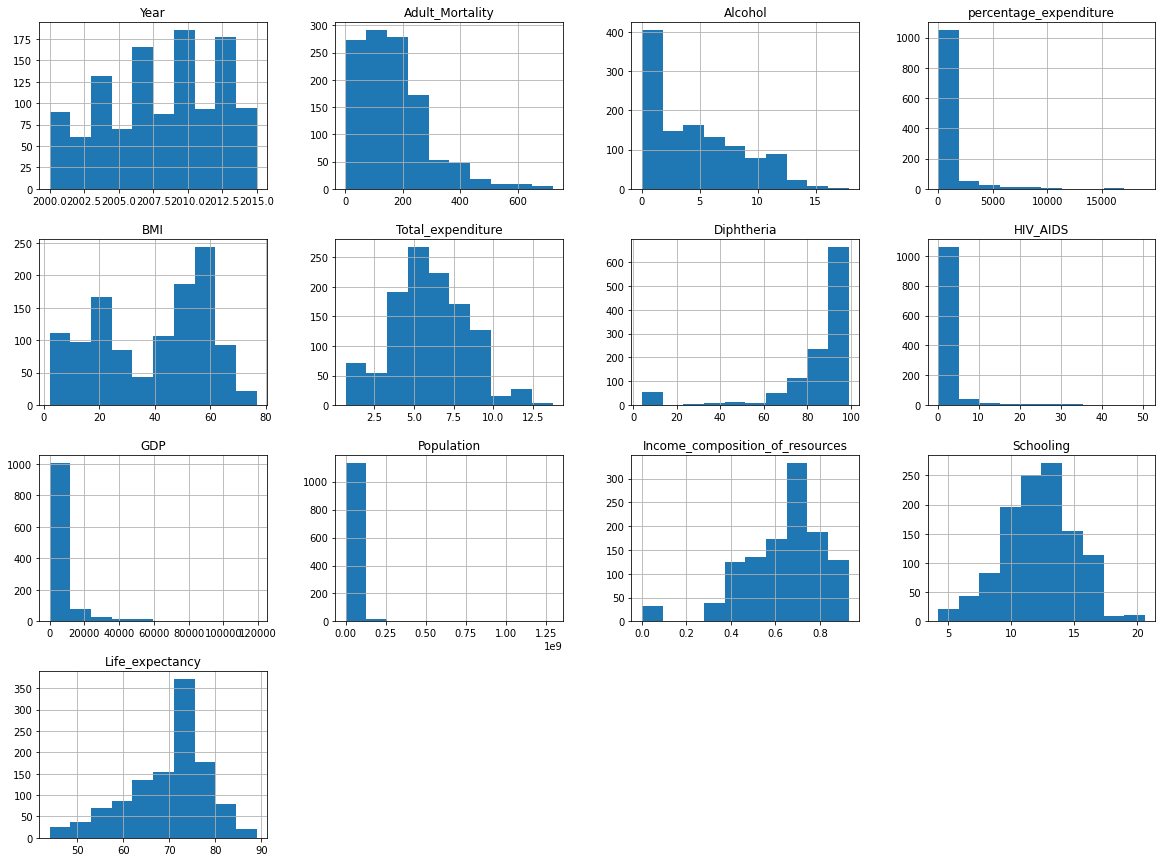

In [ ]:
### WRITE CODE TO OBTAIN AND DISPLAY HISTOGRAMS ###
df.hist( figsize=(20, 15));

Some of the features like percentage_expenditure and GPD have extreme values in the data. Values like Population are not clearly interpretable in an histogram and require a box plot. The scaling between the variables is also quite different from each other; hence, some normalization might be useful.

''

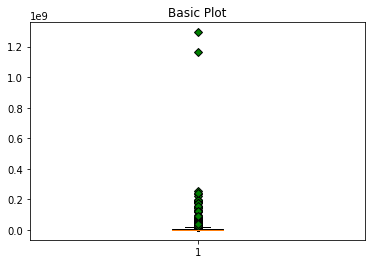

In [ ]:
import matplotlib.pyplot as plt

green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df.Population, flierprops=green_diamond)
;

''

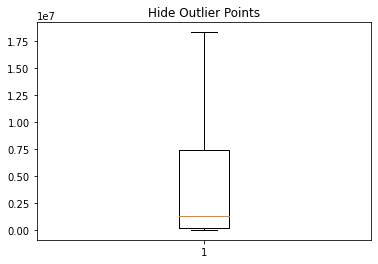

In [ ]:
fig4, ax4 = plt.subplots()
ax4.set_title('Hide Outlier Points')
ax4.boxplot(df.Population, showfliers=False)
;

Compute the correlation matrix to get an understanding of the correlation between life_expectancy and the other features.<br/>

In [ ]:
import seaborn as sns

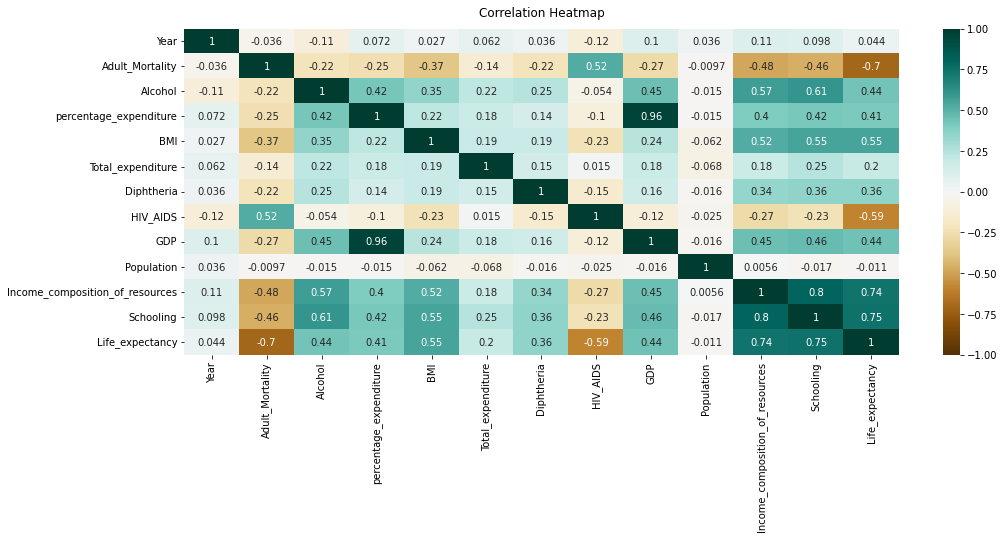

In [ ]:
### WRITE CODE TO OBTAIN CORRELATION MATRIX ###
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

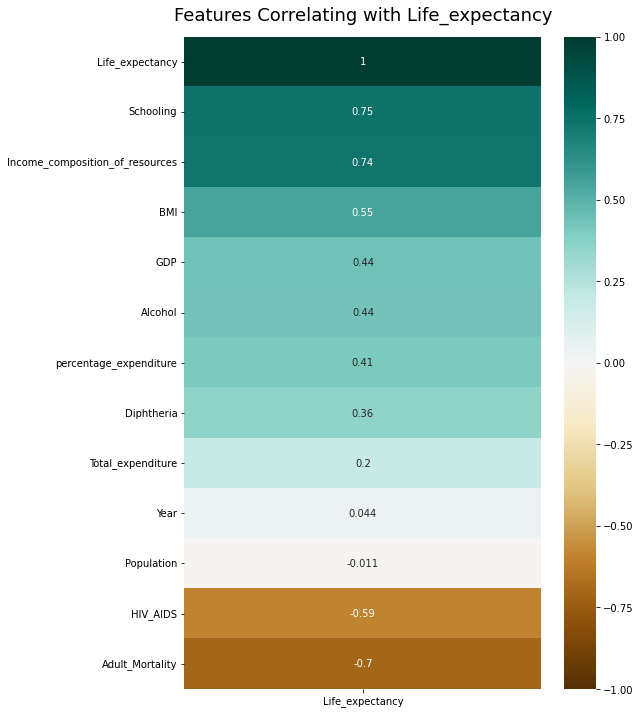

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Life_expectancy']].sort_values(by='Life_expectancy', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Life_expectancy', fontdict={'fontsize':18}, pad=16);

### Standardization of features

Feature standardization makes the values of each feature in the data have zero-mean and unit-variance. This method is widely used for normalization in many machine learning algorithms. The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values of each feature by its standard deviation.

$x'$ = ($x$ - $\bar{x}$)/$\sigma$ 

where $x$ is the original feature vector,
$\bar{x}$ is the mean of the feature vector and
$\sigma$ is its standard deviation.

This is also called Z-score Normalization. 

Perform Z-score Normalization on the features (except "Year" and "Status") in both training and test set. 

In [6]:
# Load the test set "LifeExpectancy_test.csv"
### WRITE CODE ###

uploaded = files.upload()
df_test = pd.read_csv(io.BytesIO(uploaded['LifeExpectancy_test.csv']))

Saving LifeExpectancy_test.csv to LifeExpectancy_test.csv


In [7]:
df_test.head()

,Year,Status,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling
0,2004,Developed,92,12.42,12372.051880,56.4,8.20,99,0.1,75716.35180,45895.0,0.867,13.5
1,2013,Developed,61,9.87,11734.853810,65.5,9.36,91,0.1,67792.33860,23117353.0,0.933,20.3
2,2012,Developed,57,7.40,10947.023270,58.1,11.80,98,0.1,57134.77700,9519374.0,0.903,15.8
3,2014,Developed,6,9.71,10769.363050,66.1,9.42,92,0.1,62214.69120,2346694.0,0.936,20.4
4,2008,Developed,8,11.36,8285.264655,59.0,1.39,96,0.1,45699.19832,821197.0,0.903,16.6


In [8]:
# Creating a separate dataframe for Life_expectancy which is our 'y' variable before standardization of features 

y = df[['Life_expectancy']]
y.head()

,Life_expectancy
0,75.0
1,74.6
2,81.1
3,74.8
4,71.4


In [9]:
# Dropping Year,Status and Life Expectancy from the training dataframe

data_training = df.drop(['Year','Status','Life_expectancy'], axis=1)
data_training.head()


,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling
0,93,1.57,835.062683,64.0,7.12,81,0.1,8734.96530,4588368.0,0.758,13.2
1,152,6.41,789.077295,32.4,4.12,99,0.1,5941.84710,68416772.0,0.737,13.6
2,68,11.82,90.585012,56.6,11.14,95,0.1,554.71532,8479375.0,0.887,15.7
3,135,0.01,1.576409,59.9,5.57,94,0.1,12.27733,1998979.0,0.797,14.7
4,192,5.93,27.638103,2.2,3.70,96,0.7,296.54617,6473164.0,0.657,11.5


In [10]:
# Dropping Year and Status from the test dataframe

data_test = df_test.drop(['Year','Status'], axis=1)
data_test.head()

,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling
0,92,12.42,12372.051880,56.4,8.20,99,0.1,75716.35180,45895.0,0.867,13.5
1,61,9.87,11734.853810,65.5,9.36,91,0.1,67792.33860,23117353.0,0.933,20.3
2,57,7.40,10947.023270,58.1,11.80,98,0.1,57134.77700,9519374.0,0.903,15.8
3,6,9.71,10769.363050,66.1,9.42,92,0.1,62214.69120,2346694.0,0.936,20.4
4,8,11.36,8285.264655,59.0,1.39,96,0.1,45699.19832,821197.0,0.903,16.6


In [11]:
from sklearn.preprocessing import StandardScaler
### WRITE CODE TO PERFORM Z-score Normalization ###

# define standard scaler
std_scaler  = StandardScaler()

# transform data
df_training_scaled = pd.DataFrame(std_scaler.fit_transform(data_training), columns=data_training.columns)
df_test_scaled = pd.DataFrame(std_scaler.transform(data_test), columns=data_test.columns)

# Using transform to apply mean and standard deviation of the training set on the test set

In [12]:
df_training_scaled.head()

,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling
0,-0.596230,-0.746122,0.058789,1.260316,0.455246,-0.172026,-0.304462,0.244064,-0.140504,0.668903,0.361049
1,-0.111399,0.462190,0.033498,-0.333480,-0.836894,0.686328,-0.304462,0.011425,0.961461,0.553909,0.505181
2,-0.801666,1.812804,-0.350645,0.887085,2.186713,0.495582,-0.304462,-0.437269,-0.073327,1.375298,1.261876
3,-0.251096,-1.135578,-0.399597,1.053526,-0.212360,0.447896,-0.304462,-0.482448,-0.185208,0.882465,0.901545
4,0.217300,0.342358,-0.385264,-1.856665,-1.017793,0.543269,-0.198197,-0.458771,-0.107964,0.115834,-0.251513


In [ ]:
df_test_scaled.head()

,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling
0,-0.604447,1.962594,6.403688,0.876998,0.920416,0.686328,-0.304462,5.822937,-0.218927,1.265780,0.469148
1,-0.859189,1.325984,6.053254,1.335970,1.420044,0.304837,-0.304462,5.162947,0.179390,1.627191,2.919397
2,-0.892058,0.709345,5.619977,0.962740,2.470984,0.638641,-0.304462,4.275280,-0.055372,1.462913,1.297909
3,-1.311150,1.286039,5.522271,1.366232,1.445887,0.352523,-0.304462,4.698385,-0.179205,1.643619,2.955430
4,-1.294715,1.697964,4.156113,1.008133,-2.012741,0.543269,-0.304462,3.322811,-0.205542,1.462913,1.586173


In [ ]:
df_test_scaled.describe()

,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,0.072789,-0.021175,-0.053485,-0.148403,-0.153696,-0.071837,0.097236,-0.066215,0.110825,-0.078356,-0.093769
std,1.094361,1.019370,0.885850,0.979877,0.958922,1.092199,1.210478,0.841848,1.609953,1.006448,1.021017
min,-1.352237,-1.135578,-0.400464,-1.866752,-2.129034,-3.939245,-0.304462,-0.482526,-0.219714,-3.481851,-2.809861
25%,-0.723600,-0.985787,-0.382821,-0.999243,-0.802437,-0.315085,-0.304462,-0.448967,-0.215723,-0.743886,-0.755976
50%,-0.094964,-0.231840,-0.338346,-0.136778,-0.186517,0.352523,-0.304462,-0.367550,-0.192697,0.115834,-0.035315
75%,0.566543,0.689373,-0.125682,0.801343,0.425096,0.590955,-0.162775,-0.093505,-0.076266,0.594978,0.541214
max,4.531473,3.001144,6.403688,1.921035,3.586531,0.686328,8.586428,5.822937,20.146863,1.643619,3.063529


#####  Advantages and Disadvantages of using Z-score Normalization<br/>
  
Advantage - 
*   It brings the data in a similar comparison scale across all numerical fields
*   maintains variability as the column uses its own mean and standard deviation

Disadvantage - 
* It is assuming the data is normally distributed 
* Interpretation of the underlying data becomes difficult. To explain any effect the data has to be destandardized again


### One-Hot Encoding

"Year" and "Status" can only take discrete values. We need to perform one-hot encoding on discrete values for it to be processed in the model. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.
Perform one-hot encoding on "Year" and "Status" and print the shape of your encoded array

We have referenced the below article to implement encoding


#####https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

In [13]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(drop='first', sparse=False)
train_enc_cat = enc.fit_transform(df.loc[:, ['Year', 'Status']])
train_enc_cat = pd.DataFrame(train_enc_cat, columns=enc.get_feature_names())

In [14]:
train_enc_cat.head()

,x0_2001,x0_2002,x0_2003,x0_2004,x0_2005,x0_2006,x0_2007,x0_2008,x0_2009,x0_2010,x0_2011,x0_2012,x0_2013,x0_2014,x0_2015,x1_Developing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
#Applying the same one hot encoding on the Test dataset 

test_enc_cat = enc.transform(df_test.loc[:, ['Year', 'Status']])
test_enc_cat = pd.DataFrame(test_enc_cat, columns=enc.get_feature_names())
test_enc_cat.head()

,x0_2001,x0_2002,x0_2003,x0_2004,x0_2005,x0_2006,x0_2007,x0_2008,x0_2009,x0_2010,x0_2011,x0_2012,x0_2013,x0_2014,x0_2015,x1_Developing
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Print the shape of your encoded X
print('Training: ', train_enc_cat.shape)
print('Testing: ', test_enc_cat.shape)

Training:  (1154, 16)
Testing:  (495, 16)


**Combining the Normalized dataset and the One hot encoded dataset**

drop='first' command in the Onehot Encoder takes care of the multicolliniarity brought on by dummy variables

In [17]:
training_processed = pd.concat([train_enc_cat,df_training_scaled], axis=1)
training_processed.head()

,x0_2001,x0_2002,x0_2003,x0_2004,x0_2005,x0_2006,x0_2007,x0_2008,x0_2009,x0_2010,x0_2011,x0_2012,x0_2013,x0_2014,x0_2015,x1_Developing,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.596230,-0.746122,0.058789,1.260316,0.455246,-0.172026,-0.304462,0.244064,-0.140504,0.668903,0.361049
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.111399,0.462190,0.033498,-0.333480,-0.836894,0.686328,-0.304462,0.011425,0.961461,0.553909,0.505181
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.801666,1.812804,-0.350645,0.887085,2.186713,0.495582,-0.304462,-0.437269,-0.073327,1.375298,1.261876
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.251096,-1.135578,-0.399597,1.053526,-0.212360,0.447896,-0.304462,-0.482448,-0.185208,0.882465,0.901545
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.217300,0.342358,-0.385264,-1.856665,-1.017793,0.543269,-0.198197,-0.458771,-0.107964,0.115834,-0.251513


In [18]:
testing_processed = pd.concat([test_enc_cat,df_test_scaled], axis=1)
testing_processed.head()

,x0_2001,x0_2002,x0_2003,x0_2004,x0_2005,x0_2006,x0_2007,x0_2008,x0_2009,x0_2010,x0_2011,x0_2012,x0_2013,x0_2014,x0_2015,x1_Developing,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.604447,1.962594,6.403688,0.876998,0.920416,0.686328,-0.304462,5.822937,-0.218927,1.265780,0.469148
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.859189,1.325984,6.053254,1.335970,1.420044,0.304837,-0.304462,5.162947,0.179390,1.627191,2.919397
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.892058,0.709345,5.619977,0.962740,2.470984,0.638641,-0.304462,4.275280,-0.055372,1.462913,1.297909
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.311150,1.286039,5.522271,1.366232,1.445887,0.352523,-0.304462,4.698385,-0.179205,1.643619,2.955430
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.294715,1.697964,4.156113,1.008133,-2.012741,0.543269,-0.304462,3.322811,-0.205542,1.462913,1.586173


Q7. What are the advantages and disadvantages of using One-hot encoding?

Ans- 
Advantage - 
*   Unlike label encoder which gives data in ordinal scale, one hot encoder gives values in categorical value which has no natural order in the data 

Disadvantage - 
* The feature space can blow up really quickly, when there are more categories. This results in high cardinality  


## Multiple Linear Regression

Using multiple regression accounts for the covariances between predictors.

While the algorithmic solution to multiple regression exists, it is easier to conceptualize in terms of linear algebra. The optimal $\hat{\beta}$ vector that minimizes the residual sum of squares is:

$\hat{\beta} = (X^TX)^{-1}X^Ty $


In [19]:
y.head()

,Life_expectancy
0,75.0
1,74.6
2,81.1
3,74.8
4,71.4


In [20]:
x = training_processed
x.head()

,x0_2001,x0_2002,x0_2003,x0_2004,x0_2005,x0_2006,x0_2007,x0_2008,x0_2009,x0_2010,x0_2011,x0_2012,x0_2013,x0_2014,x0_2015,x1_Developing,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.596230,-0.746122,0.058789,1.260316,0.455246,-0.172026,-0.304462,0.244064,-0.140504,0.668903,0.361049
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.111399,0.462190,0.033498,-0.333480,-0.836894,0.686328,-0.304462,0.011425,0.961461,0.553909,0.505181
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.801666,1.812804,-0.350645,0.887085,2.186713,0.495582,-0.304462,-0.437269,-0.073327,1.375298,1.261876
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.251096,-1.135578,-0.399597,1.053526,-0.212360,0.447896,-0.304462,-0.482448,-0.185208,0.882465,0.901545
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.217300,0.342358,-0.385264,-1.856665,-1.017793,0.543269,-0.198197,-0.458771,-0.107964,0.115834,-0.251513


In [21]:
x_testing = testing_processed
x_testing.head()

,x0_2001,x0_2002,x0_2003,x0_2004,x0_2005,x0_2006,x0_2007,x0_2008,x0_2009,x0_2010,x0_2011,x0_2012,x0_2013,x0_2014,x0_2015,x1_Developing,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.604447,1.962594,6.403688,0.876998,0.920416,0.686328,-0.304462,5.822937,-0.218927,1.265780,0.469148
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.859189,1.325984,6.053254,1.335970,1.420044,0.304837,-0.304462,5.162947,0.179390,1.627191,2.919397
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.892058,0.709345,5.619977,0.962740,2.470984,0.638641,-0.304462,4.275280,-0.055372,1.462913,1.297909
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.311150,1.286039,5.522271,1.366232,1.445887,0.352523,-0.304462,4.698385,-0.179205,1.643619,2.955430
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.294715,1.697964,4.156113,1.008133,-2.012741,0.543269,-0.304462,3.322811,-0.205542,1.462913,1.586173


**Fitting the Linear Model on all the coefficients**

In [22]:
### Bulding and fitting the Multiple Linear Regression model###

from sklearn.linear_model import LinearRegression
# fitting the training data

lm = LinearRegression()
model = lm.fit(x,y)

In [23]:
predicted = lm.predict(x)
predicted = pd.DataFrame(predicted)
print(predicted)

              0
0     74.571327
1     71.883044
2     78.169860
3     75.988897
4     67.963980
...         ...
1149  68.742491
1150  86.533769
1151  76.742655
1152  60.645204
1153  63.998722

[1154 rows x 1 columns]


In [24]:
# Placing the predicted value and the actual Y value next to each other to see the overview 

predicted = lm.predict(x)
predicted = pd.DataFrame(predicted)
out= pd.concat([predicted, y], axis=1)
out.head()


,0,Life_expectancy
0,74.571327,75.0
1,71.883044,74.6
2,78.169860,81.1
3,75.988897,74.8
4,67.963980,71.4


In [25]:
### Evaluate the Linear Regression model by computing MSE on the training set###
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Squared Error(MSE):',mean_squared_error(y,predicted))
print()

print('Additional Scoring Parameters - ')
print()
print('R ^2 :',lm.score(x,y))
print('Root Mean Squared Error(RMSE):',np.sqrt(mean_squared_error(y,predicted)))

print('Mean Absolute Error(MAE) :',metrics.mean_absolute_error(y,predicted))


Mean Squared Error(MSE): 12.965318722949505

Additional Scoring Parameters - 

R ^2 : 0.83142413446943
Root Mean Squared Error(RMSE): 3.6007386357453806
Mean Absolute Error(MAE) : 2.762402840375894


Q8. Print the value of coefficients and also the corresponding variable names for the coefficients.

In [26]:
import statsmodels.api as sm
X = sm.add_constant(x)
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     205.7
Date:                Mon, 15 Nov 2021   Prob (F-statistic):               0.00
Time:                        06:14:20   Log-Likelihood:                -3115.9
No. Observations:                1154   AIC:                             6288.
Df Residuals:                    1126   BIC:                             6429.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              71.7545      0.633    113.360      0.000      70.513      72.996
x0_2001                            -0.8142      0.770     -1.058      0.290      -2.324       0.696
x0_2002                            -1.0661      0.718     -1.485      0.138      -2.474       0.342
x0_2003                            -0.7750      0.718     -1.080      0.280      -2.183       0.633
x0_2004                            -1.0621      0.698     -1.522      0.128      -2.431       0.307
x0_2005                            -1.0805      0.700     -1.543      0.123      -2.454       0.293
x0_2006                            -1.3744      0.679     -2.026      0.043      -2.706      -0.043
x0_2007                            -1.3800      0.676     -2.041      0.042      -2.707      -0.053
x0_2008                            -1.6980      0.673     -2.522      0.012      -3.019      -0.377
x0_2009                            -1.9980      0.660     -3.026      0.003      -3.294      -0.702
x0_2010                            -2.1438      0.669     -3.204      0.001      -3.457      -0.831
x0_2011                            -2.3843      0.667     -3.575      0.000      -3.693      -1.076
x0_2012                            -2.3037      0.682     -3.377      0.001      -3.642      -0.965
x0_2013                            -2.3915      0.670     -3.568      0.000      -3.707      -1.076
x0_2014                            -2.4432      0.677     -3.609      0.000      -3.772      -1.115
x0_2015                            -0.4106      2.639     -0.156      0.876      -5.588       4.767
x1_Developing                      -0.5633      0.405     -1.391      0.165      -1.358       0.232
Adult_Mortality                    -2.0560      0.143    -14.356      0.000      -2.337      -1.775
Alcohol                            -0.4900      0.163     -3.009      0.003      -0.810      -0.170
percentage_expenditure              0.5524      0.379      1.458      0.145      -0.191       1.296
BMI                                 0.7257      0.133      5.450      0.000       0.464       0.987
Total_expenditure                   0.2280      0.114      2.003      0.045       0.005       0.451
Diphtheria                          0.4566      0.116      3.920      0.000       0.228       0.685
HIV_AIDS                           -2.6669      0.129    -20.674      0.000      -2.920      -2.414
GDP                                 0.2315      0.392      0.590      0.555      -0.538       1.001
Population                         -0.0551      0.108     -0.508      0.612      -0.268       0.158
Income_composition_of_resources     2.0431      0.192     10.633      0.000       1.666       2.420
Schooling                           2.6528      0.202     13.131      0.000       2

Based on the Correlation plot, there is a high correlation (0.96) between percentage expenditure and GDP. Similarly, in the VIF table (below) as well, these two columns have VIF > 10. One solution would be to remove one of these variables (ex. % expenditure) because the information captured in them is almost identically contributing to the target variable.


In [ ]:
#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,features,vif_Factor
0,const,34.796502
1,x0_2001,1.928090
2,x0_2002,2.239605
3,x0_2003,2.239289
4,x0_2004,2.442391
5,x0_2005,2.424989
6,x0_2006,2.639440
7,x0_2007,2.651420
8,x0_2008,2.744967
9,x0_2009,2.888486


### Goodness of fit

A model can always make predictions. But it is important to determine how good the model is.
How do we know that our model captures the data well? When evaluating model fit, a good metric is $R^2$, which corresponds to the amount of variance explained by the model. The formula for $R^2$ is the following:

$R^2$ = $1 - \dfrac{RSS}{TSS}$<br/>
where:<br/>
$RSS = \Sigma(y - \hat{y})^2$<br/>
$TSS = \Sigma(y - \bar{y})^2$<br/>

$R^2$ is also one metric for comparing models against each other. It is intuitive to say that the model that explains more variation in the data is a better fit than one that explains less variation. 


In [27]:
from sklearn.metrics import r2_score

In [28]:
# predicting the accuracy score - R^2 when taking all the features 

score=r2_score(y,predictions)
print('r2 socre is',score)

r2 socre is 0.83142413446943


$R^2$ for model with "Schooling" as predictor and "Life_expectancy" as outcome

In [29]:
### WRITE CODE ###
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

x_schooling = x[['Schooling']]

model_schooling = regressor.fit(x_schooling,y)
predictions_schooling = regressor.predict(x_schooling)

# Print R2 score


score_schooling=r2_score(y,predictions_schooling)
print('r2 score is',score_schooling)

r2 score is 0.5575121346397232


$R^2$ for model with "Schooling", "Adult_Mortality" as predictor and "Life_expectancy" as outcome

In [30]:
### WRITE CODE ###
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

x_schooling_adultmor = x[['Schooling','Adult_Mortality']]

model_schooling_adultmor  = regressor.fit(x_schooling_adultmor,y)
predictions_schooling_adultmor  = regressor.predict(x_schooling_adultmor)

# Print R2 score

score_schooling_adultmor =r2_score(y,predictions_schooling_adultmor)
print('r2 socre is',score_schooling_adultmor)

r2 socre is 0.7223314341007621


$R^2$ for model with "Schooling","Adult_Mortality" and "Population" as predictor and "Life_expectancy" as outcome

In [ ]:
### WRITE CODE ###
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

x_schooling_adultmor_pop = x[['Schooling','Adult_Mortality','Population']]

model_schooling_adultmor_pop   = regressor.fit(x_schooling_adultmor_pop,y)
predictions_schooling_adultmor_pop   = regressor.predict(x_schooling_adultmor_pop)

# Print R2 score

score_schooling_adultmor_pop  =r2_score(y,predictions_schooling_adultmor_pop)
print('r2 socre is',score_schooling_adultmor_pop)

r2 socre is 0.7223745101723086


$R^2$ is always going up as we keep adding features.
The adjusted R-squared increases only if the new term improves the model more than would be expected by chance.


$AdjustedR^2$ = $1 - \dfrac{(1-R^2)(n-1)}{(n-k-1)}$<br/>
where:<br/>
n = number of samples<br/>
k = number of features

In [ ]:
# Calculating the adjusted R^2 when taking all the features 

n = len(x)
# The k value will be all the features minus 1 for removing the Y variable 

k = (len(df.columns) - 1)
Adj_r2 = 1-(1-score)*(n-1)/(n-k-1)
print('Adj r2  is',Adj_r2)

Adj r2  is 0.8295017781081164


Adjusted $R^2$ for model with "Schooling" as predictor and "Life_expectancy" as outcome

In [ ]:
### WRITE CODE ###

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

x_schooling = x[['Schooling']]

model_schooling = regressor.fit(x_schooling,y)
predictions_schooling = regressor.predict(x_schooling)

# Print Adjusted R2 score

n = len(x_schooling)
k = len(x_schooling.columns)
Adj_r2 = 1-(1-score_schooling)*(n-1)/(n-k-1)
print('Adj r2  is',Adj_r2)


Adj r2  is 0.5571280305899313


Adjusted $R^2$ for model with "Schooling", "Adult_Mortality" as predictor and "Life_expectancy" as outcome.

In [ ]:
### WRITE CODE ###
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

x_schooling_adultmor = x[['Schooling','Adult_Mortality']]

model_schooling_adultmor  = regressor.fit(x_schooling_adultmor,y)
predictions_schooling_adultmor  = regressor.predict(x_schooling_adultmor)

# Print Adjusted R2 score

n = len(x_schooling_adultmor)
k = len(x_schooling_adultmor.columns)
Adj_r2 = 1-(1-score_schooling_adultmor)*(n-1)/(n-k-1)
print('Adj r2  is',Adj_r2)


Adj r2  is 0.7218489517968537


Adjusted $R^2$ for model with "Schooling","Adult_Mortality" and "Population" as predictor and "Life_expectancy" as outcome

In [ ]:
### WRITE CODE ###
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

x_schooling_adultmor_pop = x[['Schooling','Adult_Mortality','Population']]

model_schooling_adultmor_pop   = regressor.fit(x_schooling_adultmor_pop,y)
predictions_schooling_adultmor_pop   = regressor.predict(x_schooling_adultmor_pop)

# Print Adjusted R2 score

n = len(x_schooling_adultmor_pop)
k = len(x_schooling_adultmor_pop.columns)
Adj_r2 = 1-(1-score_schooling_adultmor_pop)*(n-1)/(n-k-1)
print('Adj r2  is',Adj_r2)


Adj r2  is 0.7216502697640624


**As we can see, the adjusted R^2 of the last model is lower than the adjusted R^2 of the second model  even though we have added an extra variable.**

### K-fold Cross-Validation

However, adjusted $R^2$ is not enough to help us ahieve the best model, a more robust method is k-fold cross-validation.

* Randomly split dataset into K equal-sized subsets, or folds
* Treat each fold as validation set (train on all but K'th fold and test on K'th fold only)

* The overall error is then the mean error over all K models.
* Most common are 5- or 10-fold cross-validation


In [31]:
# Design a function to implement 5-fold cross-validation. 
# The input: training features X, training target y and # of folds f=5.
# The output: the average of MSE over the 5 folds.

from sklearn.model_selection import KFold
from statistics import mean
import random

def cross_val_mse(X, y, f=5):
    # Write your code here
    mse = []

    indexes = list(range(len(y)))
    random.shuffle(indexes)
    indexes = np.array_split(indexes,f)
    
    for k in range(len(indexes)):
        train_index = np.array([]) 
        for j in range(len(indexes)):
            if k != j:
                train_index = np.concatenate([train_index, indexes[j]], axis=0) if train_index.size else indexes[j]
                                              
        X_train = X.iloc[train_index]
        X_test = X.iloc[indexes[k]]
        
        y_train = y.iloc[train_index]
        y_test = y.iloc[indexes[k]]
        
        lm = LinearRegression().fit(X_train, y_train)
        mse.append(mean_squared_error(y_test, lm.predict(X_test)))
        
    return(mean(mse))

In [ ]:
cross_val_mse(x, y, f=5)

13.778613624420766

In [ ]:
# By using your above functions, find the best combination of features, which has the lowest averaged MSE 
from itertools import combinations 
### Write code here ###

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#drop year and Population: correlation < 0.05
X_var = x.iloc[:,15:27].drop(columns='Population')
#drop percentage_expenditure, keep GDP: correlation between GPD and percentage_expenditure > 0.9
X_var = X_var.drop(columns='percentage_expenditure')
Y_var = y

# Referenced: xavierbourretsicotte.github.io/subset_selection.html
features_list = []
avg_mse = []
for n_features in range(1,len(X_var.columns) + 1):
  for features in combinations(X_var.columns, n_features):
    regr = LinearRegression()
    reg = regr.fit(X=X_var[list(features)], y=Y_var)
    mse = cross_val_mse(X=X_var, y=Y_var, f=5)
    features_list.append(features)
    avg_mse.append(mse)
feature_mse = pd.DataFrame({'features_list':features_list, 'avg_mse':avg_mse})
feature_mse_min = feature_mse.loc[feature_mse['avg_mse'] == feature_mse.avg_mse.min(), ['features_list']]

In [ ]:
# Print the best features and the corresponding mse
### WRITE CODE ###
best_features = list(feature_mse_min.iat[0, 0])
best_features_df = x[best_features]
regr = LinearRegression()
reg = regr.fit(X=best_features_df, y=y)
predicted = reg.predict(best_features_df)
expected = y
print('best features:', best_features)
print('MSE:', mean_squared_error(expected, predicted))

best features: ['x1_Developing', 'Adult_Mortality', 'BMI', 'Total_expenditure', 'Diphtheria', 'HIV_AIDS', 'GDP', 'Income_composition_of_resources', 'Schooling']
MSE: 13.462613898470503


### Testing the model on unseen y 


In [ ]:
### WRITE CODE ###
best_features = list(feature_mse_min.iat[0, 0])
best_features_df = x[best_features]
regr = LinearRegression()
reg = regr.fit(X=best_features_df, y=y)


y_pred = reg.predict(x_testing[best_features])
y_pred = pd.DataFrame(y_pred,columns=['y_pred'])

In [ ]:
# Output your prediction on test set as y_pred.
y_pred

,y_pred
0,80.511684
1,87.624831
2,82.852412
3,88.461064
4,82.968632
...,...
490,59.988510
491,59.637036
492,49.869011
493,62.554013
